In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pyquil import get_qc
from pyquil.quil import Program, MEASURE, Pragma
from pyquil.gates import I, X, RX, H, CNOT
from pyquil.noise import (estimate_bitstring_probs, correct_bitstring_probs,
                          bitstring_probs_to_z_moments, estimate_assignment_probs)

DARK_TEAL = '#48737F'
FUSCHIA = '#D6619E'
BEIGE = '#EAE8C6'

qc = get_qc("1q-qvm")

In [9]:
%%time

# number of angles
num_theta = 101

# number of program executions
trials = 200

thetas = np.linspace(0, 2*np.pi, num_theta)

p00s = [1., 0.95, 0.9, 0.8]

results_rabi = np.zeros((num_theta, len(p00s)))

for jj, theta in enumerate(thetas):
    for kk, p00 in enumerate(p00s):
        # qc.qam.random_seed = hash((jj, kk))
        qc.qam.random_seed = abs(hash((jj, kk)))
        p = Program(RX(theta, 0)).wrap_in_numshots_loop(trials)
        # assume symmetric noise p11 = p00
        p.define_noisy_readout(0, p00=p00, p11=p00)
        ro = p.declare("ro", "BIT", 1)
        p.measure(0, ro[0])
        res = qc.run(p).readout_data.get("ro")
        results_rabi[jj, kk] = np.sum(res)

CPU times: total: 812 ms
Wall time: 9.95 s


Text(0.5, 1.0, 'Effect of classical readout noise on Rabi contrast.')

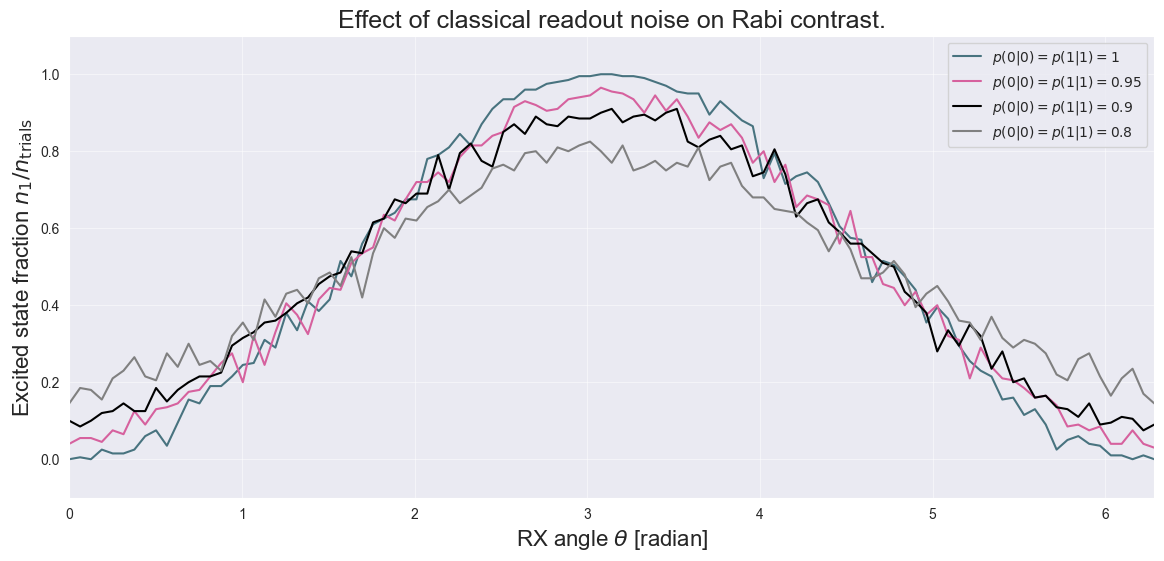

In [10]:
plt.figure(figsize=(14, 6))
for jj, (p00, c) in enumerate(zip(p00s, [DARK_TEAL, FUSCHIA, "k", "gray"])):
    plt.plot(thetas, results_rabi[:, jj]/trials, c=c, label=r"$p(0|0)=p(1|1)={:g}$".format(p00))
plt.legend(loc="best")
plt.xlim(*thetas[[0,-1]])
plt.ylim(-.1, 1.1)
plt.grid(alpha=.5)
plt.xlabel(r"RX angle $\theta$ [radian]", size=16)
plt.ylabel(r"Excited state fraction $n_1/n_{\rm trials}$", size=16)
plt.title("Effect of classical readout noise on Rabi contrast.", size=18)

In [18]:
%%time

# number of angles
num_theta = 101

# number of program executions
trials = 500

thetas = np.linspace(0, 8*np.pi, num_theta)

p00s = [1., 0.95, 0.9, 0.8]

results_rabi = np.zeros((num_theta, len(p00s)))

for jj, theta in enumerate(thetas):
    for kk, p00 in enumerate(p00s):
        # theta_mod = theta % 2*np.pi
        theta_mod=theta
        # qc.qam.random_seed = hash((jj, kk))
        qc.qam.random_seed = abs(hash((jj, kk)))
        p = Program(RX(theta_mod, 0)).wrap_in_numshots_loop(trials)
        # assume symmetric noise p11 = p00
        p.define_noisy_readout(0, p00=p00, p11=p00)
        ro = p.declare("ro", "BIT", 1)
        p.measure(0, ro[0])
        res = qc.run(p).readout_data.get("ro")
        results_rabi[jj, kk] = np.sum(res)

CPU times: total: 1.47 s
Wall time: 9.77 s


Text(0.5, 1.0, 'Effect of classical readout noise on Rabi contrast.')

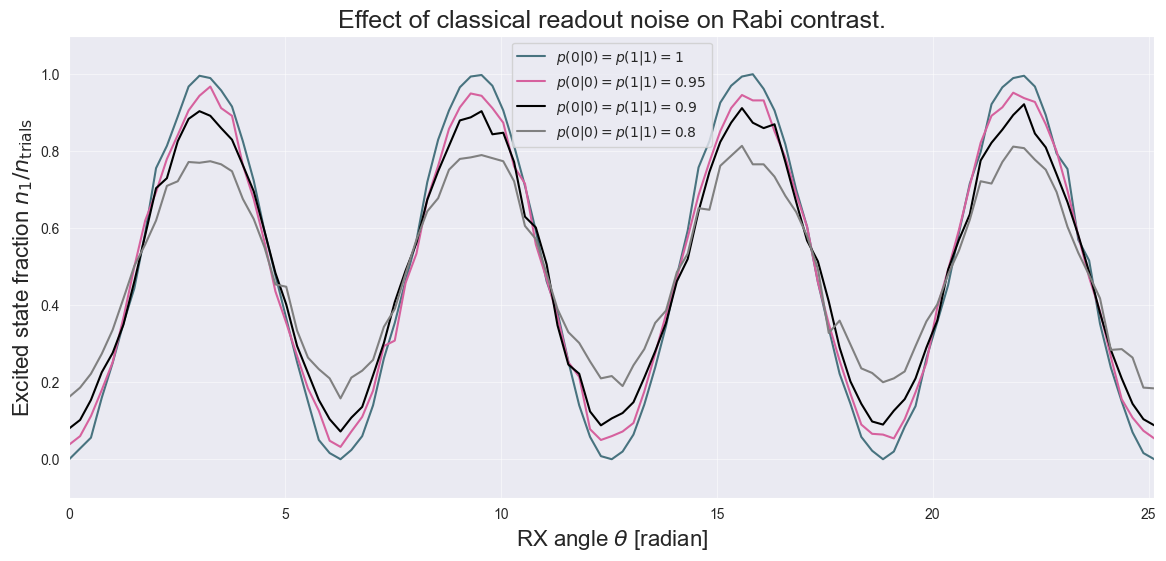

In [19]:
plt.figure(figsize=(14, 6))
for jj, (p00, c) in enumerate(zip(p00s, [DARK_TEAL, FUSCHIA, "k", "gray"])):
    plt.plot(thetas, results_rabi[:, jj]/trials, c=c, label=r"$p(0|0)=p(1|1)={:g}$".format(p00))
plt.legend(loc="best")
plt.xlim(*thetas[[0,-1]])
plt.ylim(-.1, 1.1)
plt.grid(alpha=.5)
plt.xlabel(r"RX angle $\theta$ [radian]", size=16)
plt.ylabel(r"Excited state fraction $n_1/n_{\rm trials}$", size=16)
plt.title("Effect of classical readout noise on Rabi contrast.", size=18)

target:

Text(0.5, 1.0, 'Effect of classical readout noise on Rabi contrast.')

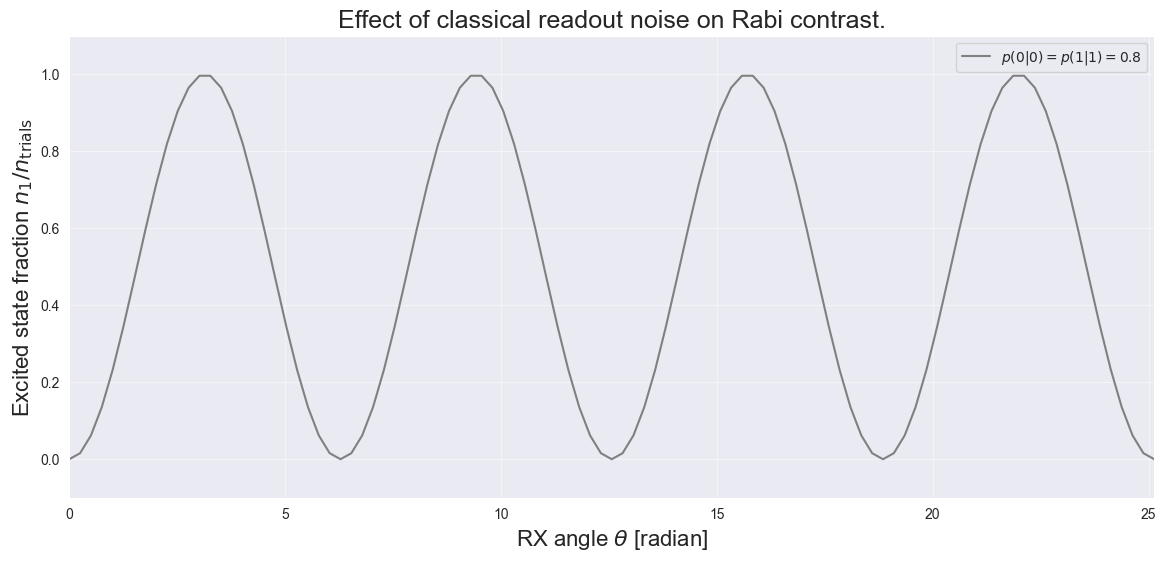

In [38]:
plt.figure(figsize=(14, 6))
plt.plot(thetas, np.sin(thetas-np.pi/2)/2+0.5, c=c, label=r"$p(0|0)=p(1|1)={:g}$".format(p00))
plt.legend(loc="best")
plt.xlim(*thetas[[0,-1]])
plt.ylim(-.1, 1.1)
plt.grid(alpha=.5)
plt.xlabel(r"RX angle $\theta$ [radian]", size=16)
plt.ylabel(r"Excited state fraction $n_1/n_{\rm trials}$", size=16)
plt.title("Effect of classical readout noise on Rabi contrast.", size=18)